# Objectif : optimiser le modèle SVM déjà existant

Matériel : données sonores de 200ms, matérialisées par 71 paramàtres. 2 classes : les voitures et les camions

### Pour cela, nous utilisons les techniques suivantes :
-GridSearch

In [1]:
# -*- coding: utf-8 -*-
"""
Example script

Script to perform some corrections in the brief audio project

Created on Fri Jan 27 09:08:40 2023

@author: ValBaron10
"""

# Import
import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt
from features_functions import compute_features

from sklearn import preprocessing

# SVM
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# import de la grid search
from sklearn.model_selection import GridSearchCV

In [2]:
# Set the paths to the files 
data_path = "Data/"

In [3]:
# Names of the classes
classes_paths = ["Cars/", "Trucks/"]
classes_names = ["car", "truck"]
cars_list = [4,5,7,9,10,15,20,21,23,26,30,38,39,44,46,48,51,52,53,57]
trucks_list = [2,4,10,11,13,20,22,25,27,30,31,32,33,35,36,39,40,45,47,48]
nbr_of_sigs = 20 # Nbr of sigs in each class
seq_length = 0.2 # Nbr of second of signal for one sequence
nbr_of_obs = int(nbr_of_sigs*10/seq_length) # Each signal is 10 s long

# Go to search for the files
learning_labels = []
for i in range(2*nbr_of_sigs):
    if i < nbr_of_sigs:
        name = f"{classes_names[0]}{cars_list[i]}.wav"
        class_path = classes_paths[0]
    else:
        name = f"{classes_names[1]}{trucks_list[i - nbr_of_sigs]}.wav"
        class_path = classes_paths[1]

    # Read the data and scale them between -1 and 1
    fs, data = sio.wavfile.read(data_path + class_path + name)
    data = data.astype(float)
    data = data/32768

    # Cut the data into sequences (we take off the last bits)
    data_length = data.shape[0]
    nbr_blocks = int((data_length/fs)/seq_length)
    seqs = data[:int(nbr_blocks*seq_length*fs)].reshape((nbr_blocks, int(seq_length*fs)))

    for k_seq, seq in enumerate(seqs):
        # Compute the signal in three domains
        sig_sq = seq**2
        sig_t = seq / np.sqrt(sig_sq.sum())
        sig_f = np.absolute(np.fft.fft(sig_t))
        sig_c = np.absolute(np.fft.fft(sig_f))

        # Compute the features and store them
        features_list = []
        N_feat, features_list = compute_features(sig_t, sig_f[:sig_t.shape[0]//2], sig_c[:sig_t.shape[0]//2], fs)
        features_vector = np.array(features_list)[np.newaxis,:]

        if k_seq == 0 and i == 0:
            learning_features = features_vector
            learning_labels.append(classes_names[0])
        elif i < nbr_of_sigs:
            learning_features = np.vstack((learning_features, features_vector))
            learning_labels.append(classes_names[0])
        else:
            learning_features = np.vstack((learning_features, features_vector))
            learning_labels.append(classes_names[1])

print(learning_features.shape)
print(len(learning_labels))

(1983, 71)
1983


In [4]:
# Separate data in train and test
X_train, X_test, y_train, y_test = train_test_split(learning_features, learning_labels, test_size=0.2, random_state=42)

# Standardize the labels
labelEncoder = preprocessing.LabelEncoder().fit(y_train)
learningLabelsStd = labelEncoder.transform(y_train)
testLabelsStd = labelEncoder.transform(y_test)

### Création de la grid_search

In [5]:
# , # définir les paramètres de la gridSearch 
# param_grid = {
#     'C' : [.001],
#     'gamma': [.01],
#     'kernel' : ['poly']
#              }

# grid= GridSearchCV(SVC(), param_grid, refit= True, verbose = 4 )

# # fiter le modèle pour la grid search
# grid.fit(X_train, y_train)

# # print best parameter after tuning
# # print(grid.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

# grid_predictions = grid.predict(X_test)
  
# # print classification report
# print(classification_report(y_test, grid_predictions))

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


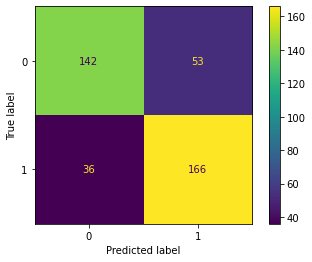

In [17]:
# Learn the model
model = svm.SVC(C=1, kernel='linear',gamma=.001, class_weight=None, probability=False)
scaler = preprocessing.StandardScaler(with_mean=True).fit(X_train)
learningFeatures_scaled = scaler.transform(X_train)

model.fit(learningFeatures_scaled, learningLabelsStd)

# Test the model
testFeatures_scaled = scaler.transform(X_test)

# Matrix confusion
plot_confusion_matrix(model, testFeatures_scaled, testLabelsStd) 
plt.show()


(1983, 71)
1983


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


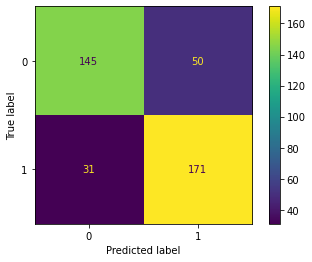

In [32]:
# -*- coding: utf-8 -*-
"""
Example script

Script to perform some corrections in the brief audio project

Created on Fri Jan 27 09:08:40 2023

@author: ValBaron10
"""

# Import
import numpy as np
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt
from features_functions import compute_features

from sklearn import preprocessing

from sklearn.metrics import classification_report

# SVM
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# import de la grid search
from sklearn.model_selection import GridSearchCV

# pickle
import pickle

# Set the paths to the files 
data_path = "Data/"

# Names of the classes
classes_paths = ["Cars/", "Trucks/"]
classes_names = ["car", "truck"]
cars_list = [4,5,7,9,10,15,20,21,23,26,30,38,39,44,46,48,51,52,53,57]
trucks_list = [2,4,10,11,13,20,22,25,27,30,31,32,33,35,36,39,40,45,47,48]
nbr_of_sigs = 20 # Nbr of sigs in each class
seq_length = 0.2 # Nbr of second of signal for one sequence
nbr_of_obs = int(nbr_of_sigs*10/seq_length) # Each signal is 10 s long

# Go to search for the files
learning_labels = []
for i in range(2*nbr_of_sigs):
    if i < nbr_of_sigs:
        name = f"{classes_names[0]}{cars_list[i]}.wav"
        class_path = classes_paths[0]
    else:
        name = f"{classes_names[1]}{trucks_list[i - nbr_of_sigs]}.wav"
        class_path = classes_paths[1]

    # Read the data and scale them between -1 and 1
    fs, data = sio.wavfile.read(data_path + class_path + name)
    data = data.astype(float)
    data = data/32768

    # Cut the data into sequences (we take off the last bits)
    data_length = data.shape[0]
    nbr_blocks = int((data_length/fs)/seq_length)
    seqs = data[:int(nbr_blocks*seq_length*fs)].reshape((nbr_blocks, int(seq_length*fs)))

    for k_seq, seq in enumerate(seqs):
        # Compute the signal in three domains
        sig_sq = seq**2
        sig_t = seq / np.sqrt(sig_sq.sum())
        sig_f = np.absolute(np.fft.fft(sig_t))
        sig_c = np.absolute(np.fft.fft(sig_f))

        # Compute the features and store them
        features_list = []
        N_feat, features_list = compute_features(sig_t, sig_f[:sig_t.shape[0]//2], sig_c[:sig_t.shape[0]//2], fs)
        features_vector = np.array(features_list)[np.newaxis,:]

        if k_seq == 0 and i == 0:
            learning_features = features_vector
            learning_labels.append(classes_names[0])
        elif i < nbr_of_sigs:
            learning_features = np.vstack((learning_features, features_vector))
            learning_labels.append(classes_names[0])
        else:
            learning_features = np.vstack((learning_features, features_vector))
            learning_labels.append(classes_names[1])

print(learning_features.shape)
print(len(learning_labels))

# Separate data in train and test
X_train, X_test, y_train, y_test = train_test_split(learning_features, learning_labels, test_size=0.2, random_state=42)

# Standardize the labels
labelEncoder = preprocessing.LabelEncoder().fit(y_train)
learningLabelsStd = labelEncoder.transform(y_train)
testLabelsStd = labelEncoder.transform(y_test)



model= svm.SVC(C=100, gamma=0.001, kernel='linear', class_weight=None, probability=False )
scaler = preprocessing.StandardScaler(with_mean=True).fit(X_train)
learningFeatures_scaled = scaler.transform(X_train)

model.fit(learningFeatures_scaled, learningLabelsStd)

# Test the model
testFeatures_scaled = scaler.transform(X_test)

# Matrix confusion
plot_confusion_matrix(model, testFeatures_scaled, testLabelsStd) 
plt.show()
